# Práctica 2 - SVM

## Funciones auxiliares
Primero, podemos crear algunas funciones auxiliares (como por ejemplo, para la transformación).

In [2]:
transformacion <- function(x1, x2) {
  for (i in 1:length(x1)) {
    if (sqrt(x1[i]^2 + x2[i]^2) > 2) {
      x1[i] <- 4 - x2[i] + abs(x1[i] - x2[i])
      x2[i] <- 4 - x1[i] + abs(x1[i] - x2[i])
    }
  }
  return(list(X1 = x2, X2 = x2))
}

print_clasificacion <- function(x, w, b) {
  print(x)
  if ((t(w) %*% x + b) >= 0) {
    print("Pertenece a la clase: 1")
  } else {
    print("Pertenece a la clase: -1")
  }
}

kernel <- function(x1, x2) {
  len_x1 <- length(x1)
  len_x2 <- length(x2)
  k <- matrix(data = NA, nrow = len_x1, ncol = len_x2)
  for (i in 1:len_x1) {
    xi <- c(x1[i], x2[i])
    for (j in 1:len_x2) {
      xj <- c(x1[j], x2[j])
      k[i, j] <- xi %*% xj
    }
  }
  return(k)
}

## Librerías y dataframes
Una vez creadas las funciones auxiliares, cargamos las librerías necesarias y creamos los dataframes a usar, poniendo la columna Y de cada uno como factor.

In [3]:
library(tidyverse)
library(e1071)
library(kernlab)
library(rgl)
data(iris)

dataframe_a <- data.frame(X1 = c(0, 4), X2 = c(0, 4), Y = c(1, -1))
dataframe_a$Y <- as.factor(dataframe_a$Y)
dataframe_a

dataframe_b <- data.frame(X1 = c(2, 0, 1), X2 = c(0, 0, 1), Y = c(1, -1, -1))
dataframe_b$Y <- as.factor(dataframe_b$Y)
dataframe_b

dataframe_c <- data.frame(X1 = c(2, 2, -2, -2, 1, 1, -1, -1),
                          X2 = c(2, -2, -2, 2, 1, -1, -1, 1),
                          Y = c(rep(1, 4), rep(-1, 4)))
dataframe_c$Y <- as.factor(dataframe_c$Y)
dataframe_c

dataframe_d <- dataframe_c
x1_x2 <- transformacion(dataframe_d$X1, dataframe_d$X2)
dataframe_d$X1 <- x1_x2$X1
dataframe_d$X2 <- x1_x2$X2
dataframe_d

dataframe_e <- data.frame(X1 = c(3, 3, 6, 6, 1, 0, 0, -1),
                          X2 = c(1, -1, 1, -1, 0, 1, -1, 0),
                          Y = c(rep(1, 4), rep(-1, 4)))
dataframe_e$Y <- as.factor(dataframe_e$Y)
dataframe_e

iris

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'kernlab'


The following object is masked from 'package:purrr':

    cross


The following object is masked from 'package:ggplot2':

    alpha




X1,X2,Y
<dbl>,<dbl>,<fct>
0,0,1
4,4,-1


X1,X2,Y
<dbl>,<dbl>,<fct>
2,0,1
0,0,-1
1,1,-1


X1,X2,Y
<dbl>,<dbl>,<fct>
2,2,1
2,-2,1
-2,-2,1
-2,2,1
1,1,-1
1,-1,-1
-1,-1,-1
-1,1,-1


X1,X2,Y
<dbl>,<dbl>,<fct>
2,2,1
6,6,1
6,6,1
2,2,1
1,1,-1
-1,-1,-1
-1,-1,-1
1,1,-1


X1,X2,Y
<dbl>,<dbl>,<fct>
3,1,1
3,-1,1
6,1,1
6,-1,1
1,0,-1
0,1,-1
0,-1,-1
-1,0,-1


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


## Desarrollo
Primero, usamos la función *svm* para crear las máquinas vector soporte para cada dataframe.

In [4]:
svm_df_a <- svm(Y ~ ., dataframe_a, kernel = "linear")
svm_df_b <- svm(Y ~ ., dataframe_b, kernel = "linear")
svm_df_c <- svm(Y ~ ., dataframe_c, kernel = "linear")
svm_df_d <- svm(Y ~ ., dataframe_d, kernel = "linear")
svm_df_e <- svm(Y ~ ., dataframe_e, kernel = "linear")
svm_iris <- svm(Species ~ ., iris, kernel = "linear")

Una vez tenemos nuestra máquina vector soporte, podemos determinar los vectores soporte.

In [5]:
support_vectors_df_a <- dataframe_a[svm_df_a$index, -length(dataframe_a)]
support_vectors_df_a
support_vectors_df_b <- dataframe_b[svm_df_b$index, -length(dataframe_b)]
support_vectors_df_b
support_vectors_df_c <- dataframe_c[svm_df_c$index, -length(dataframe_c)]
support_vectors_df_c
support_vectors_df_d <- dataframe_d[svm_df_d$index, -length(dataframe_d)]
support_vectors_df_d
support_vectors_df_e <- dataframe_e[svm_df_e$index, -length(dataframe_e)]
support_vectors_df_e
support_vectors_iris <- iris[svm_iris$index, -length(iris)]
support_vectors_iris

,X1,X2
,<dbl>,<dbl>
1,0,0
2,4,4


,X1,X2
,<dbl>,<dbl>
1,2,0
2,0,0
3,1,1


,X1,X2
,<dbl>,<dbl>
1,2,2
2,2,-2
3,-2,-2
4,-2,2
5,1,1
6,1,-1
7,-1,-1
8,-1,1


,X1,X2
,<dbl>,<dbl>
1,2,2
4,2,2
5,1,1
8,1,1


,X1,X2
,<dbl>,<dbl>
1,3,1
2,3,-1
5,1,0
6,0,1
7,0,-1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
24,5.1,3.3,1.7,0.5
42,4.5,2.3,1.3,0.3
53,6.9,3.1,4.9,1.5
55,6.5,2.8,4.6,1.5
57,6.3,3.3,4.7,1.6
58,4.9,2.4,3.3,1.0
67,5.6,3.0,4.5,1.5
69,6.2,2.2,4.5,1.5
71,5.9,3.2,4.8,1.8


Para calcular los valores de cada kernel, podemos usar nuestra función auxiliar *kernel*.

In [6]:
kernel_df_a <- kernel(dataframe_a$X1, dataframe_a$X2)
kernel_df_a
kernel_df_b <- kernel(dataframe_b$X1, dataframe_b$X2)
kernel_df_b
kernel_df_c <- kernel(dataframe_c$X1, dataframe_c$X2)
kernel_df_c
kernel_df_d <- kernel(dataframe_d$X1, dataframe_d$X2)
kernel_df_d
kernel_df_e <- kernel(dataframe_e$X1, dataframe_e$X2)
kernel_df_e

0,0
0,32


4,0,2
0,0,0
2,0,2


8,0,-8,0,4,0,-4,0
0,8,0,-8,0,4,0,-4
-8,0,8,0,-4,0,4,0
0,-8,0,8,0,-4,0,4
4,0,-4,0,2,0,-2,0
0,4,0,-4,0,2,0,-2
-4,0,4,0,-2,0,2,0
0,-4,0,4,0,-2,0,2


8,24,24,8,4,-4,-4,4
24,72,72,24,12,-12,-12,12
24,72,72,24,12,-12,-12,12
8,24,24,8,4,-4,-4,4
4,12,12,4,2,-2,-2,2
-4,-12,-12,-4,-2,2,2,-2
-4,-12,-12,-4,-2,2,2,-2
4,12,12,4,2,-2,-2,2


10,8,19,17,3,1,-1,-3
8,10,17,19,3,-1,1,-3
19,17,37,35,6,1,-1,-6
17,19,35,37,6,-1,1,-6
3,3,6,6,1,0,0,-1
1,-1,1,-1,0,1,-1,0
-1,1,-1,1,0,-1,1,0
-3,-3,-6,-6,-1,0,0,1


Teniendo los vectores soporte y los coeficientes de Lagrange, podemos calcular los vectores de pesos de cada dataframe

In [14]:
w_df_a <- crossprod(as.matrix(support_vectors_df_a), svm_df_a$coefs)
w_df_a
w_df_b <- crossprod(as.matrix(support_vectors_df_b), svm_df_b$coefs)
w_df_b
w_df_c <- crossprod(as.matrix(support_vectors_df_c), svm_df_c$coefs)
w_df_c
w_df_d <- crossprod(as.matrix(support_vectors_df_d), svm_df_d$coefs)
w_df_d
w_df_e <- crossprod(as.matrix(support_vectors_df_e), svm_df_e$coefs)
w_df_e
w_iris <- crossprod(as.matrix(support_vectors_iris), svm_iris$coefs)
w_iris

0.5
-0.5


X1,-2
X2,-2


X1,0.9995117
X2,-0.3334961


X1,0
X2,0


X1,2
X2,2


X1,4.904762e+00
X2,-4.325561e-09


Sepal.Length,-1.9420110,1.781515
Sepal.Width,-0.6597013,1.128539
Petal.Length,-3.0284030,-3.886906
Petal.Width,-1.2531487,-1.746361


Con estos vectores de pesos, podemos calcular el ancho del canal de cada máquina vector soporte

In [8]:
width_svm_a <- 2 / (sqrt(sum((w_df_a)^2)))
width_svm_a
width_svm_b <- 2 / (sqrt(sum((w_df_b)^2)))
width_svm_b
width_svm_c <- 2 / (sqrt(sum((w_df_c)^2)))
width_svm_c
width_svm_d <- 2 / (sqrt(sum((w_df_d)^2)))
width_svm_d
width_svm_e <- 2 / (sqrt(sum((w_df_e)^2)))
width_svm_e
width_iris <- 2 / (sqrt(sum((w_iris)^2)))
width_iris

[1] 0.7071068

[1] 1.898108

[1] Inf

[1] 0.7071068

[1] 0.407767

[1] 0.3263662

Para obtener el vector B, tenemos la variable *rho* de cada máquina vector soporte

In [9]:
b_df_a <- -svm_df_a$rho
b_df_a
b_df_b <- -svm_df_b$rho
b_df_b
b_df_c <- -svm_df_c$rho
b_df_c
b_df_d <- -svm_df_d$rho
b_df_d
b_df_e <- -svm_df_e$rho
b_df_e
b_iris <- -svm_iris$rho
b_iris

[1] 0

[1] -0.3333333

[1] 0

[1] 0.07692307

[1] 0.5

[1] -1.4740856 -0.2952317  3.0975890

La ecuación del hiperplano y de los planos de soporte positivo y negativo de cada máquina vector soporte serían las siguientes

In [10]:
eq_hiperplano_df_a <- c("[", w_df_a, "]' * x + [", b_df_a, "] = 0")
eq_positiva_df_a <- c("[", w_df_a, "]' * x + [", b_df_a, "] = 1")
eq_negativa_df_a <- c("[", w_df_a, "]' * x + [", b_df_a, "] = -1")
paste("Ecuaciones SVM A:")
paste(eq_hiperplano_df_a, collapse = " ")
paste(eq_positiva_df_a, collapse = " ")
paste(eq_negativa_df_a, collapse = " ")
eq_hiperplano_df_b <- c("[", w_df_b, "]' * x + [", b_df_b, "] = 0")
eq_positiva_df_b <- c("[", w_df_b, "]' * x + [", b_df_b, "] = 1")
eq_negativa_df_b <- c("[", w_df_b, "]' * x + [", b_df_b, "] = -1")
paste("Ecuaciones SVM B:")
paste(eq_hiperplano_df_b, collapse = " ")
paste(eq_positiva_df_b, collapse = " ")
paste(eq_negativa_df_b, collapse = " ")
eq_hiperplano_df_c <- c("[", w_df_c, "]' * x + [", b_df_c, "] = 0")
eq_positiva_df_c <- c("[", w_df_c, "]' * x + [", b_df_c, "] = 1")
eq_negativa_df_c <- c("[", w_df_c, "]' * x + [", b_df_c, "] = -1")
paste("Ecuaciones SVM C:")
paste(eq_hiperplano_df_c, collapse = " ")
paste(eq_positiva_df_c, collapse = " ")
paste(eq_negativa_df_c, collapse = " ")
eq_hiperplano_df_d <- c("[", w_df_d, "]' * x + [", b_df_d, "] = 0")
eq_positiva_df_d <- c("[", w_df_d, "]' * x + [", b_df_d, "] = 1")
eq_negativa_df_d <- c("[", w_df_d, "]' * x + [", b_df_d, "] = -1")
paste("Ecuaciones SVM D:")
paste(eq_hiperplano_df_d, collapse = " ")
paste(eq_positiva_df_d, collapse = " ")
paste(eq_negativa_df_d, collapse = " ")
eq_hiperplano_df_e <- c("[", w_df_e, "]' * x + [", b_df_e, "] = 0")
eq_positiva_df_e <- c("[", w_df_e, "]' * x + [", b_df_e, "] = 1")
eq_negativa_df_e <- c("[", w_df_e, "]' * x + [", b_df_e, "] = -1")
paste("Ecuaciones SVM E:")
paste(eq_hiperplano_df_e, collapse = " ")
paste(eq_positiva_df_e, collapse = " ")
paste(eq_negativa_df_e, collapse = " ")
eq_hiperplano_iris <- c("[", w_iris, "]' * x + [", b_iris, "] = 0")
eq_positiva_iris <- c("[", w_iris, "]' * x + [", b_iris, "] = 1")
eq_negativa_iris <- c("[", w_iris, "]' * x + [", b_iris, "] = -1")
paste("Ecuaciones SVM iris:")
paste(eq_hiperplano_iris, collapse = " ")
paste(eq_positiva_iris, collapse = " ")
paste(eq_negativa_iris, collapse = " ")

[1] "Ecuaciones SVM A:"

[1] "[ -2 -2 ]' * x + [ 0 ] = 0"

[1] "[ -2 -2 ]' * x + [ 0 ] = 1"

[1] "[ -2 -2 ]' * x + [ 0 ] = -1"

[1] "Ecuaciones SVM B:"

[1] "[ 0.99951168926297 -0.333496083723731 ]' * x + [ -0.333333333333333 ] = 0"

[1] "[ 0.99951168926297 -0.333496083723731 ]' * x + [ -0.333333333333333 ] = 1"

[1] "[ 0.99951168926297 -0.333496083723731 ]' * x + [ -0.333333333333333 ] = -1"

[1] "Ecuaciones SVM C:"

[1] "[ 0 0 ]' * x + [ 0 ] = 0"

[1] "[ 0 0 ]' * x + [ 0 ] = 1"

[1] "[ 0 0 ]' * x + [ 0 ] = -1"

[1] "Ecuaciones SVM D:"

[1] "[ 2 2 ]' * x + [ 0.0769230723381042 ] = 0"

[1] "[ 2 2 ]' * x + [ 0.0769230723381042 ] = 1"

[1] "[ 2 2 ]' * x + [ 0.0769230723381042 ] = -1"

[1] "Ecuaciones SVM E:"

[1] "[ 4.90476216861929 -4.3255614090576e-09 ]' * x + [ 0.500000017025348 ] = 0"

[1] "[ 4.90476216861929 -4.3255614090576e-09 ]' * x + [ 0.500000017025348 ] = 1"

[1] "[ 4.90476216861929 -4.3255614090576e-09 ]' * x + [ 0.500000017025348 ] = -1"

[1] "Ecuaciones SVM iris:"

[1] "[ -1.94201103063312 -0.659701254428128 -3.02840299720809 -1.2531487235705 1.78151488541635 1.12853896724544 -3.88690609651112 -1.74636118736971 ]' * x + [ -1.47408564212647 -0.295231745935259 3.09758904428322 ] = 0"

[1] "[ -1.94201103063312 -0.659701254428128 -3.02840299720809 -1.2531487235705 1.78151488541635 1.12853896724544 -3.88690609651112 -1.74636118736971 ]' * x + [ -1.47408564212647 -0.295231745935259 3.09758904428322 ] = 1"

[1] "[ -1.94201103063312 -0.659701254428128 -3.02840299720809 -1.2531487235705 1.78151488541635 1.12853896724544 -3.88690609651112 -1.74636118736971 ]' * x + [ -1.47408564212647 -0.295231745935259 3.09758904428322 ] = -1"

Para determinar la clase a la que pertenece cada punto dado en cada dataframe, usamos la función auxiliar *print_clasificacion*

In [11]:
puntos_df_a <- list(P1 = c(5, 6), P2 = c(1, -4))
puntos_df_b <- puntos_df_a
puntos_df_d <- list(P1 = c(3, 3), P2 = c(-3, -3))
punto_df_e <- c(4, 5)
print("En el dataframe A:")
print_clasificacion(puntos_df_a$P1, w_df_a, b_df_a)
print_clasificacion(puntos_df_a$P2, w_df_a, b_df_a)
print("En el dataframe B:")
print_clasificacion(puntos_df_b$P1, w_df_b, b_df_b)
print_clasificacion(puntos_df_b$P2, w_df_b, b_df_b)
print("En el dataframe D:")
print_clasificacion(puntos_df_d$P1, w_df_d, b_df_d)
print_clasificacion(puntos_df_d$P2, w_df_d, b_df_d)
print("En el dataframe E:")
print_clasificacion(punto_df_e, w_df_e, b_df_e)

[1] "En el dataframe A:"
[1] 5 6
[1] "Pertenece a la clase: -1"
[1]  1 -4
[1] "Pertenece a la clase: 1"


[1] "En el dataframe B:"
[1] 5 6
[1] "Pertenece a la clase: 1"
[1]  1 -4
[1] "Pertenece a la clase: 1"
[1] "En el dataframe D:"
[1] 3 3
[1] "Pertenece a la clase: 1"
[1] -3 -3
[1] "Pertenece a la clase: -1"
[1] "En el dataframe E:"
[1] 4 5
[1] "Pertenece a la clase: 1"


En el dataframe C, al tener un ancho de canal infinito y ser tanto el vector de pesos como b = 0, no hay puntos que clasifiquen negativamente

Pintamos ahora el conjunto de puntos e hiperplano de cada máquina.

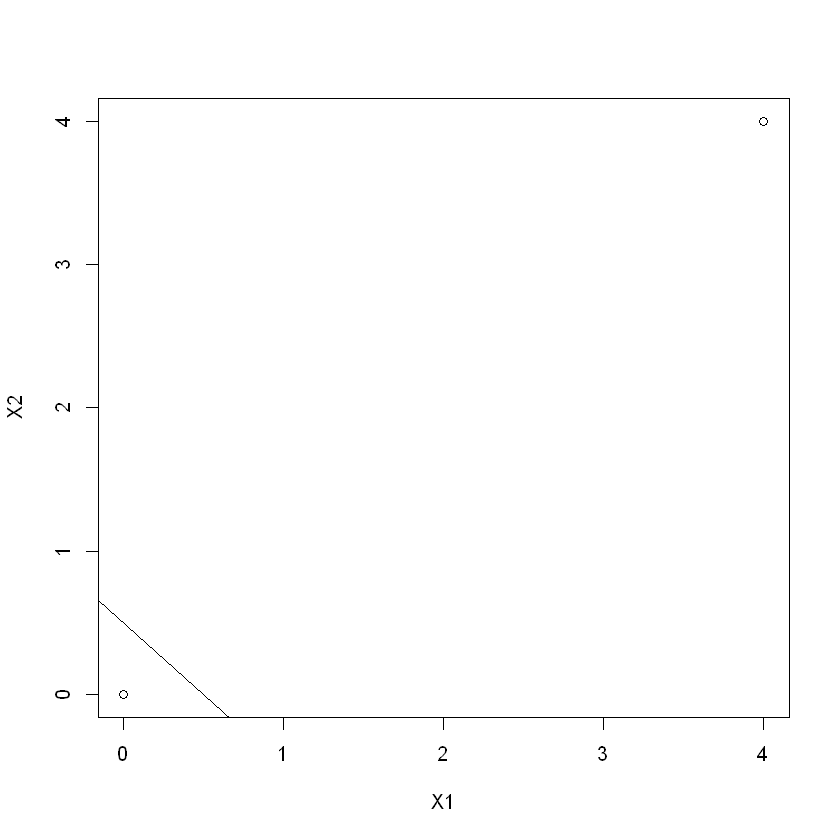

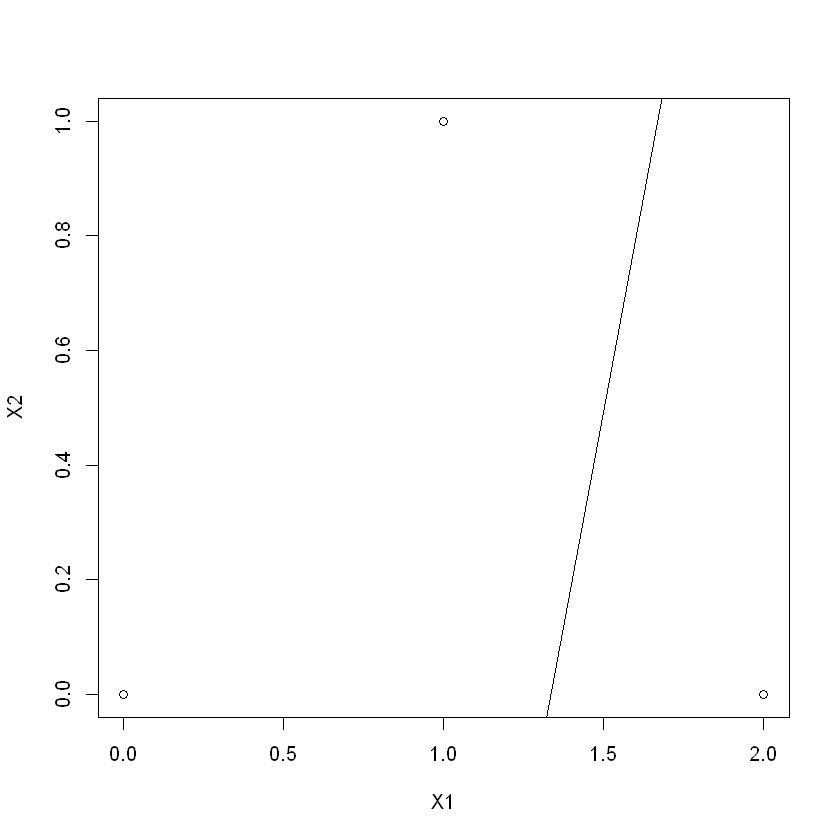

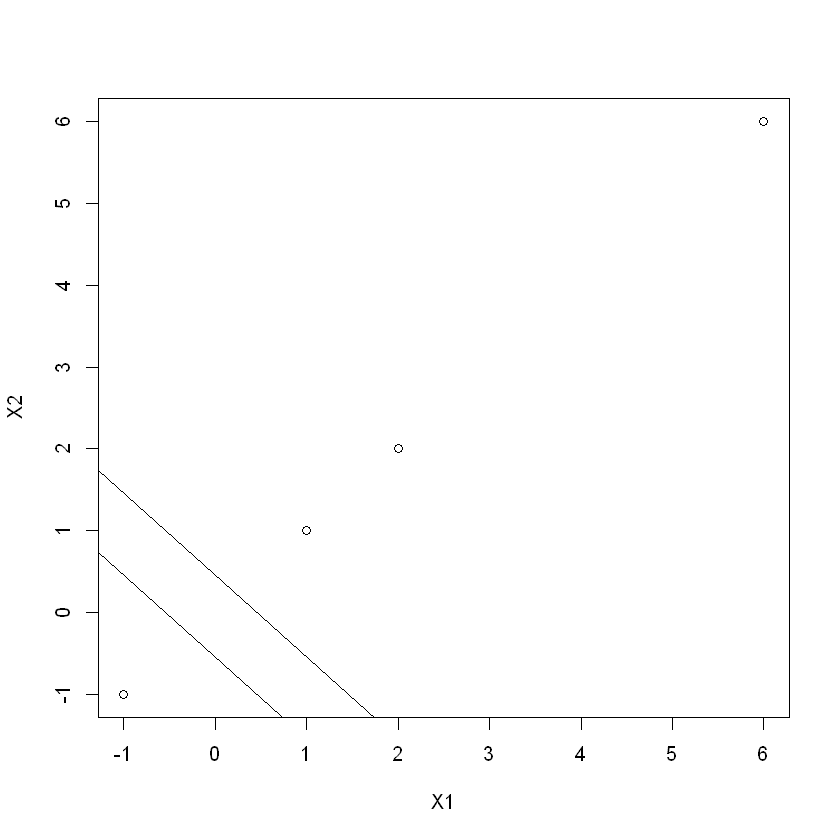

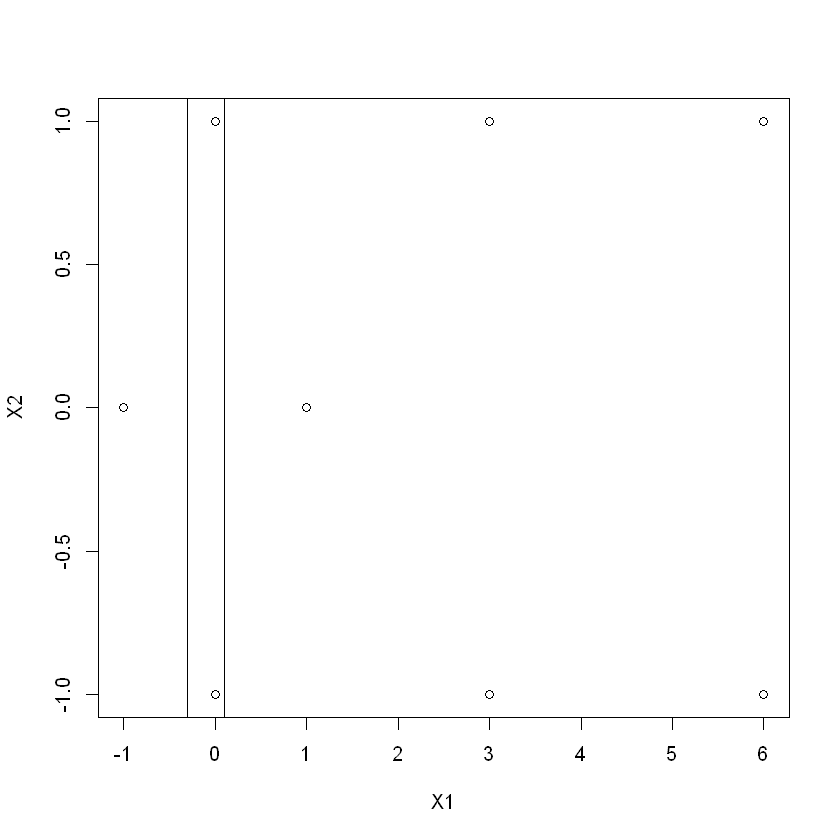

In [12]:
plot(dataframe_a$X1, dataframe_a$X2, xlab = "X1", ylab = "X2")
abline((1 - b_df_a) / w_df_a[2], -w_df_a[1] / w_df_a[2])
abline((-1 - b_df_a) / w_df_a[2], -w_df_a[1] / w_df_a[2])
plot(dataframe_b$X1, dataframe_b$X2, xlab = "X1", ylab = "X2")
abline((1 - b_df_b) / w_df_b[2], -w_df_b[1] / w_df_b[2])
abline((-1 - b_df_b) / w_df_b[2], -w_df_b[1] / w_df_b[2])
plot(dataframe_d$X1, dataframe_d$X2, xlab = "X1", ylab = "X2")
abline((1 - b_df_d) / w_df_d[2], -w_df_d[1] / w_df_d[2])
abline((-1 - b_df_d) / w_df_d[2], -w_df_d[1] / w_df_d[2])
plot(dataframe_e$X1, dataframe_e$X2, xlab = "X1", ylab = "X2")
abline((1 - b_df_e) / w_df_e[2], -w_df_e[1] / w_df_e[2])
abline((-1 - b_df_e) / w_df_e[2], -w_df_e[1] / w_df_e[2])